# Import Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from PIL import Image 
import pydicom as dicom

import scipy

from scipy.fft import fft, fftfreq
import itertools
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.metrics import auc
from tkinter.filedialog import askdirectory
import tkinter as tk

import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.distributions.mixture_rvs import mixture_rvs

import os
import csv
import pandas as pd

import pydicom as dicom

import imageio

# EXPERIMENT 1
Manual fast injection

## Extract Masks

In [ ]:
patM = 'C:/IBECPostDocDrive/2023_07_25_ScaffoldDiffusionMRIProcessing/NewExperimetns/Data_4wellchip_difusion/20230724_104854_4wellchip_MAR_4wellchip_scaffolddifussionD2O_1_1'

MPre=np.empty(5, dtype=object)

MPre[0] = scipy.ndimage.label(np.asarray(Image.open(patM+'/314_PreInject1/Mask.png'))/255)[0]
MPost = scipy.ndimage.label(np.asarray(Image.open(patM+'/317_PostInject1/Mask.png'))/255)[0]

MBack = scipy.ndimage.label(np.asarray(Image.open(patM+'/314_PreInject1/MaskBack.png'))/255)[0]


In [ ]:

dsPre = imageio.v2.imread(patM+'/314_PreInject1/pdata/1/dicom/4wellchip_4wellchip_MAR_4wellchip_sc_E314_P1_Im1.dcm')
dsPost = imageio.v2.imread(patM+'/317_PostInject1/pdata/1/dicom/4wellchip_4wellchip_MAR_4wellchip_sc_E317_P1_Im1.dcm')


## Extract Data

In [ ]:
imsis = np.shape(MPre)

In [ ]:
PreDat = [[((MPre==k)*dsPre)[i,j]-np.max((MBack*dsPre)[MBack==1]) for i in range(0,imsis[0]) for j in range(0,imsis[1]) if ((MPre==k)*dsPre)[i,j] != 0] for k in range(1,5)]
PreDatBack = [[((MPost==k)*dsPre)[i,j]-np.max((MBack*dsPre)[MBack==1]) for i in range(0,imsis[0]) for j in range(0,imsis[1]) if ((MPost==k)*dsPre)[i,j] != 0] for k in range(1,5)]

In [ ]:
PostDat = [[((MPost==k)*dsPost)[i,j]-np.max((MBack*dsPost)[MBack==1]) for i in range(0,imsis[0]) for j in range(0,imsis[1]) if ((MPost==k)*dsPost)[i,j] != 0] for k in range(1,5)]
PostDatBack = [[((MPre==k)*dsPost)[i,j]-np.max((MBack*dsPost)[MBack==1]) for i in range(0,imsis[0]) for j in range(0,imsis[1]) if ((MPre==k)*dsPost)[i,j] != 0] for k in range(1,5)]

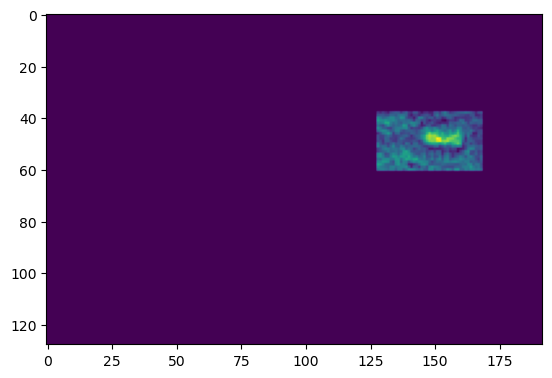

In [ ]:
plt.imshow((MPre==1)*dsPre)
plt.imshow((MPre==2)*dsPost)

(array([ 33., 148., 269., 235., 150.,  53.,  22.,  17.,  12.,   4.]),
 array([  45.83574295,  331.65432739,  617.47296143,  903.29156494,
        1189.11010742, 1474.92871094, 1760.74731445, 2046.56591797,
        2332.38452148, 2618.203125  , 2904.02172852]),
 <BarContainer object of 10 artists>)

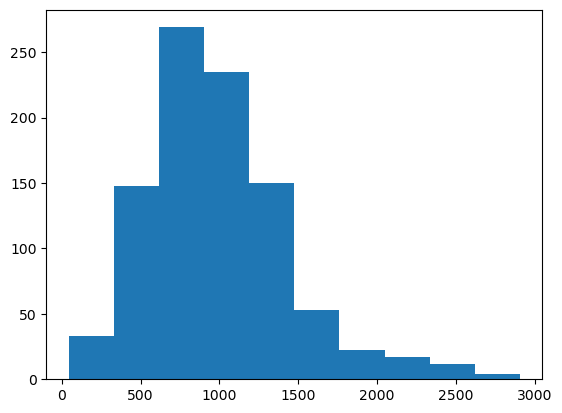

In [ ]:
plt.hist(((MPre==2)*dsPost)[MPre==2])

In [ ]:
[PreDat[0][i] for i in range(len(PreDat[0])) if PreDat[0][i] > 100]

[157.0092724533996,
 383.9965771408996,
 400.0570019455871,
 416.1174267502746,
 688.0739086838684,
 104.54522216043085,
 208.40264403543085,
 397.91558348855585,
 658.0944775315246,
 119.53496825418085,
 206.26125609597773,
 443.95550048074335,
 697.7101391526184,
 1354.0460156174622,
 1245.9058788987122,
 1356.1874951096497,
 1966.4835156174622,
 2175.268916008087,
 2606.758906242462,
 3249.175898429962,
 3447.254511711212,
 3544.687617179962,
 3303.781367179962,
 2849.806757804962,
 2418.316767570587,
 2002.8870800705872,
 2109.956660148712,
 2184.905146476837,
 1655.9820507737122,
 1173.0986279221497,
 392.5621288987121,
 127.02984130105585,
 164.5041455002746,
 235.17000853738398,
 223.39235961160273,
 242.66485106668085,
 331.53252684793085,
 289.77544676980585,
 324.03765380105585,
 545.6715038987121,
 919.3439892502746,
 1033.9083203049622,
 768.3759716721496,
 902.2128857346496,
 1187.0176953049622,
 1100.2913769455872,
 997.5047558518371,
 910.7784374924621,
 560.661249992462

In [ ]:
np.min(PreDat[0])

-184.5423632887879

779.4658203125

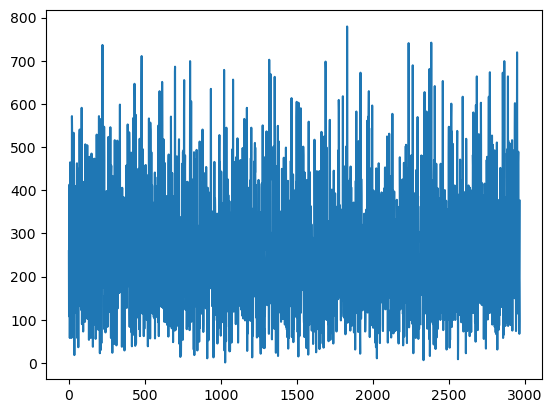

In [ ]:
plt.plot((MBack*dsPre)[MBack==1])
np.max((MBack*dsPre)[MBack==1])

In [ ]:
np.mean([PreDat[0][i] for i in range(len(PreDat[0])) if PreDat[0][i] > 800])/np.mean([PreDatBack[0][i] for i in range(len(PreDatBack[0])) if PreDatBack[0][i] > 800])

6.058737775452939

In [ ]:
np.mean([PostDatBack[0][i] for i in range(len(PostDatBack[0])) if PostDatBack[0][i] > 800])/np.mean([PostDat[0][i] for i in range(len(PostDat[0])) if PostDat[0][i] > 800])

0.37100296427648816

In [ ]:
mm1 = [np.mean([PreDat[k][i] for i in range(len(PreDat[k])) if PreDat[k][i] > 0])/np.mean([PreDatBack[k][i] for i in range(len(PreDatBack[k])) if PreDatBack[k][i] > 0]) for k in range(0,4)]

In [ ]:
mm2 = [np.mean([PostDatBack[k][i] for i in range(len(PostDatBack[k])) if PostDatBack[k][i] > 0])/np.mean([PostDat[k][i] for i in range(len(PostDat[k])) if PostDat[k][i] > 0]) for k in range(0,4)]

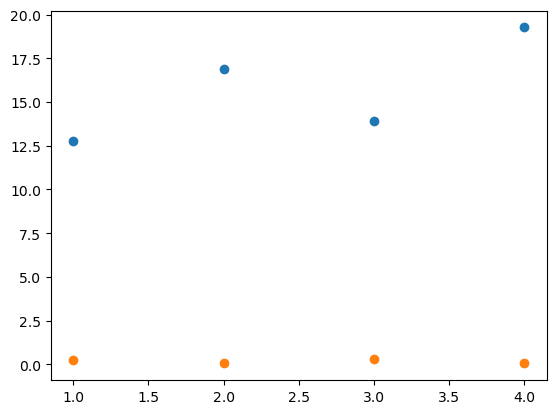

In [ ]:
plt.figure()
plt.scatter(range(1,5), mm1)
plt.scatter(range(1,5), mm2)
plt.show()

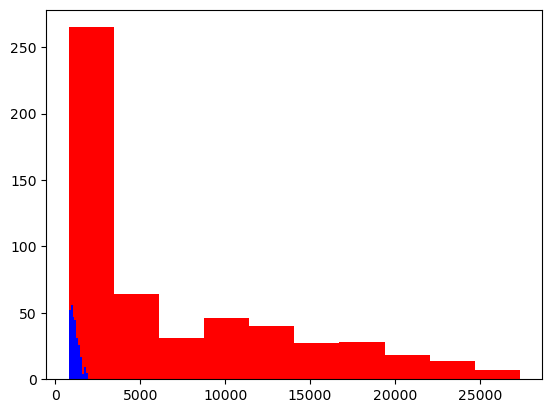

In [ ]:
plt.figure()
plt.hist([PreDat[0][i] for i in range(len(PreDat[0])) if PreDat[0][i] > 800], color = 'red')
plt.hist([PreDatBack[0][i] for i in range(len(PreDatBack[0])) if PreDatBack[0][i] > 800], color = 'blue')

# plt.hist(PreDatBack[0], color='blue')
plt.show()

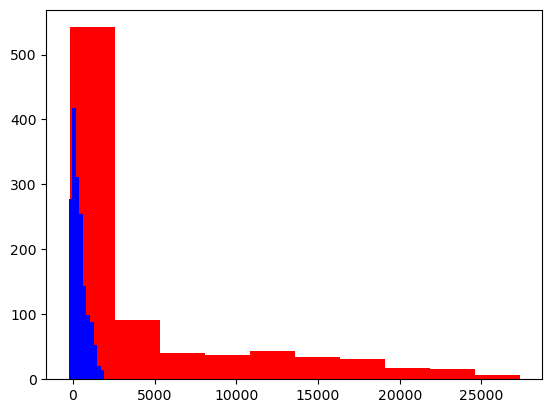

In [ ]:
plt.figure()
plt.hist(PreDat[0], color = 'red')
plt.hist(PreDatBack[0], color='blue')
plt.show()

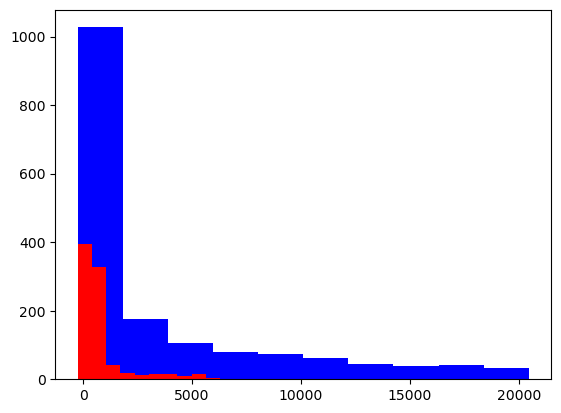

In [ ]:
plt.figure()
plt.hist(PostDat[0], color='blue')
plt.hist(PostDatBack[0], color = 'red')
plt.show()